# Ismail Olumegbon (Home Work #6)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Home Work 6 Question 1

In [30]:
# Equation details
#X' = Ux
#Ux' = ax = -(D/m)UUx
#Y' = Uy
#Uy = -g - (D/m)UUy
#U = sqrt(Ux^2 + Uy^2)
#y[0], y[1], y[2], y[3] = X, Y, Ux, Uy

In [31]:
def freefall(y,t,A,rho,C,mass):
    dxdt = np.array([y[2], y[3],
              - ((0.5*A*rho*C/mass)*y[2]*np.sqrt(y[2]**2 + y[3]**2)), 
              -g  - ((0.5*A*rho*C/mass)*y[3]*np.sqrt(y[2]**2 + y[3]**2))])
    return dxdt

#define the constants 
g = 9.8
A = 0.0379
rho = 1.25
mass = 0.43
theta = 0
u0 = 9.8
C = [0, 0.25]

# set the initial conditions
x0 = np.array([0,0,u0*np.cos(np.deg2rad(theta)),u0*np.sin(np.deg2rad(theta))])

# define the discretization points
time_interval=np.linspace(0,4,1000)

y_t2=np.array([odeint(freefall,x0,time_interval, args=(A,rho,m,mass)) for m in C])

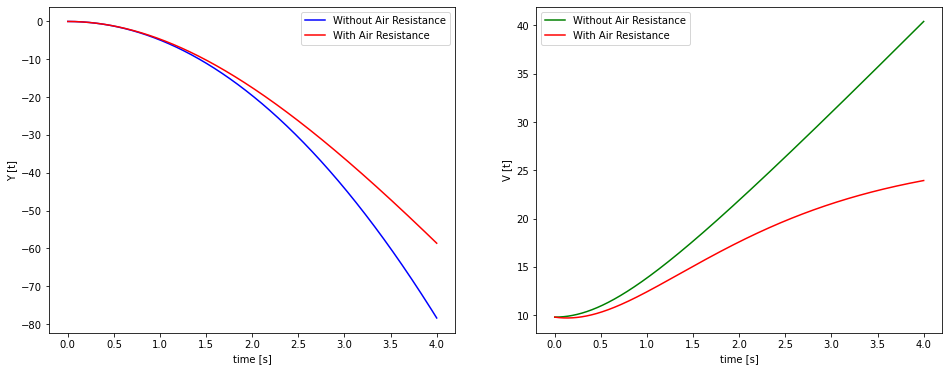

In [32]:
Valone = np.sqrt(y_t2[0,:,2]**2 + y_t2[0,:,3]**2)
V_drag = np.sqrt(y_t2[1,:,2]**2 + y_t2[1,:,3]**2)
fig, (ax12, ax13) = plt.subplots(1,2, figsize=(16,6))
ax12.plot(time_interval,y_t2[0,:,1],'b',label='Without Air Resistance')
ax12.plot(time_interval,y_t2[1,:,1],c='r',label='With Air Resistance')
ax13.plot(time_interval,Valone,'g',label='Without Air Resistance')
ax13.plot(time_interval,V_drag,c='r',label='With Air Resistance')
ax12.set_xlabel('time [s]')
ax13.set_xlabel('time [s]')

ax12.set_ylabel('Y [t]')
ax13.set_ylabel('V [t]')
ax12.legend()
ax13.legend()

In [29]:
Terminal_Velocity = max(V_drag)
print(f'The Terminal velocity of the ball through air is {Terminal_Velocity} m/s')

The Terminal velocity of the ball through air is 26.675774884623006 m/s


# The Terminal velocity of the ball through air is 26.675774884623006 m/s

# Home Work 6 Question 2

In [6]:
def radioactive_euler(tau,N0,dt,tend):
    
   # tau = 2
    t = np.arange(0,tend,dt)
    N = np.empty_like(t)
    Nexact = np.empty_like(t)
    dN = np.empty_like(t)
    N[0]=N0
    for i in range(1,t.size):
        N[i]=N[i-1] - N[i-1]/tau*dt
        Nexact[i] = N0*np.exp(-t[i]/tau)
        dN[i] = np.abs(N[i] - Nexact[i])/Nexact[i]
  
    return t, N, dN

In [11]:
tau,N0,tend = 2,100,15
dt = [1.0, 0.1, 0.001]
t1, t2, t3 = np.arange(0.01,tend,dt[0]), np.arange(0.01,tend,dt[1]), np.arange(0.01,tend,dt[2])
N_euler = np.array([radioactive_euler(tau,N0,h,tend) for h in dt])

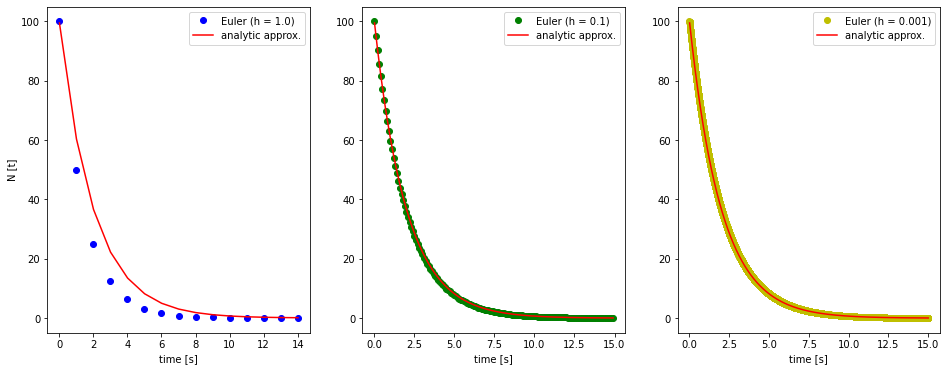

In [10]:
fig, (ax9, ax10, ax11) = plt.subplots(1,3, figsize=(16,6))
ax9.plot(N_euler[0, 0],N_euler[0, 1],'bo',label='Euler (h = 1.0)')
ax9.plot(t1,N0*np.exp(-t1/tau),c='r',label='analytic approx.')
ax10.plot(N_euler[1, 0],N_euler[1, 1],'go',label='Euler (h = 0.1)')
ax10.plot(t2,N0*np.exp(-t2/tau),c='r',label='analytic approx.')
ax11.plot(N_euler[2, 0],N_euler[2, 1],'yo',label='Euler (h = 0.001)')
ax11.plot(t3,N0*np.exp(-t3/tau),c='r',label='analytic approx.')
ax9.set_xlabel('time [s]')
ax10.set_xlabel('time [s]')
ax11.set_xlabel('time [s]')
ax9.set_ylabel('N [t]')
ax9.legend()
ax10.legend()
ax11.legend()

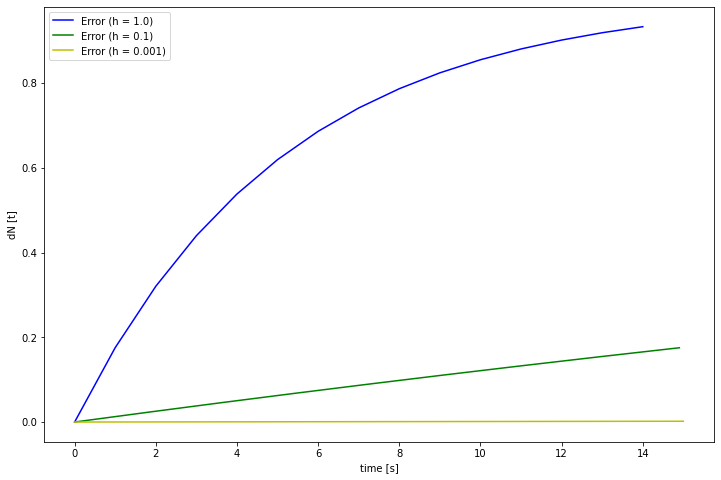

In [12]:
fig,ax=plt.subplots(figsize = (12, 8))
ax.plot(N_euler[0, 0],N_euler[0, 2],'b-',label='Error (h = 1.0)')
ax.plot(N_euler[1, 0],N_euler[1, 2],'g-',label='Error (h = 0.1)')
ax.plot(N_euler[2, 0],N_euler[2, 2],'y-',label='Error (h = 0.001)')
ax.set_xlabel('time [s]')
ax.set_ylabel('dN [t]')
ax.legend()

In [13]:
def radioactive_euler2(taup, taud,Np0, Nd0,dt,tend):
    
   # tau = 2
    t = np.arange(0,tend,dt)
    Np = np.empty_like(t)
    Nd = np.empty_like(t)
    Np[0]=Np0
    Nd[0]=Nd0
    for i in range(1,t.size):
        Np[i]=Np[i-1] - Np[i-1]/taup*dt
        Nd[i]=Nd[i-1] + ((Np[i-1]/taup)-(Nd[i-1]/taud))*dt

  
    return t, Np, Nd

In [14]:
taud = [0.02, 2.0, 200.0]
taup, Np0, Nd0, dt, tend = 2, 100, 0, 0.001, 15
N_euler2 = np.array([radioactive_euler2(taup, h, Np0, Nd0,dt,tend) for h in taud])

Text(0, 0.5, 'N [t]')

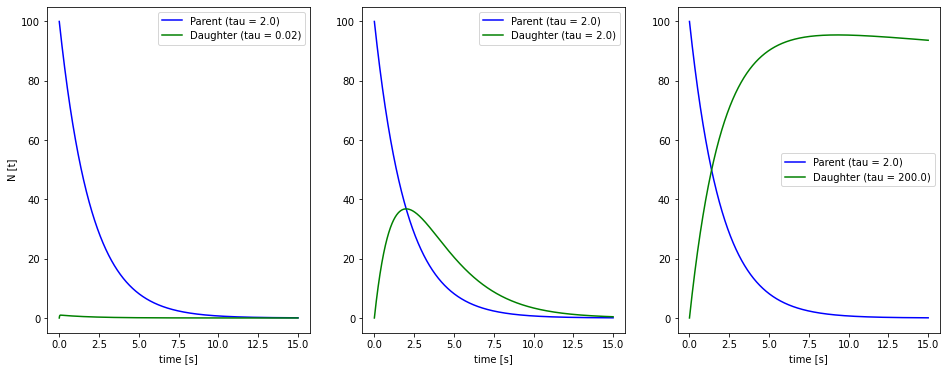

In [15]:
fig, (ax6, ax7, ax8) = plt.subplots(1,3, figsize=(16,6))
ax6.plot(N_euler2[0, 0],N_euler2[0, 1],'b',label='Parent (tau = 2.0)')
ax6.plot(N_euler2[0, 0],N_euler2[0, 2],'g',label='Daughter (tau = 0.02)')
ax7.plot(N_euler2[1, 0],N_euler2[1, 1],'b',label='Parent (tau = 2.0)')
ax7.plot(N_euler2[1, 0],N_euler2[1, 2],'g',label='Daughter (tau = 2.0)')
ax8.plot(N_euler2[2, 0],N_euler2[2, 1],'b',label='Parent (tau = 2.0)')
ax8.plot(N_euler2[2, 0],N_euler2[2, 2],'g',label='Daughter (tau = 200.0)')
ax6.legend()
ax7.legend()
ax8.legend()
ax6.set_xlabel('time [s]')
ax7.set_xlabel('time [s]')
ax8.set_xlabel('time [s]')
ax6.set_ylabel('N [t]')

# Home Work 6 Question 3

In [16]:
def motion(x,t,damp_r,w0):
    dxdt=np.array([x[1],-2*damp_r*w0*x[1]-w0**2*x[0]])
    return dxdt

# set the initial conditions
x0=np.array([1,0])

# define the discretization points
timePoints3=np.linspace(0,10,100)
 
#define the constants 
damp_r = [0.0, 0.2, 1.0, 5.0] 
w0 = 2*np.pi 

solution3=np.array([odeint(motion,x0,timePoints3, args=(damp,w0)) for damp in damp_r])

(0.0, 10.0)

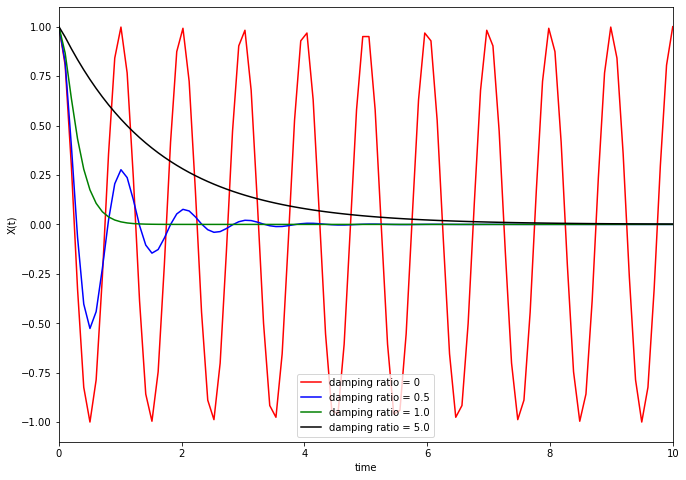

In [17]:
fig, ax3 = plt.subplots(figsize=(11,8))
ax3.plot(timePoints3, solution3[0, :, 0], 'r', label='damping ratio = 0')
ax3.plot(timePoints3, solution3[1, :, 0], 'b', label='damping ratio = 0.5')
ax3.plot(timePoints3, solution3[2, :, 0], 'g', label='damping ratio = 1.0')
ax3.plot(timePoints3, solution3[3, :, 0], 'black', label='damping ratio = 5.0')
ax3.legend()
ax3.set_xlabel('time')
ax3.set_ylabel('X(t)')
ax3.set_xlim(0.0,10)

# Home Work 6 Question 4

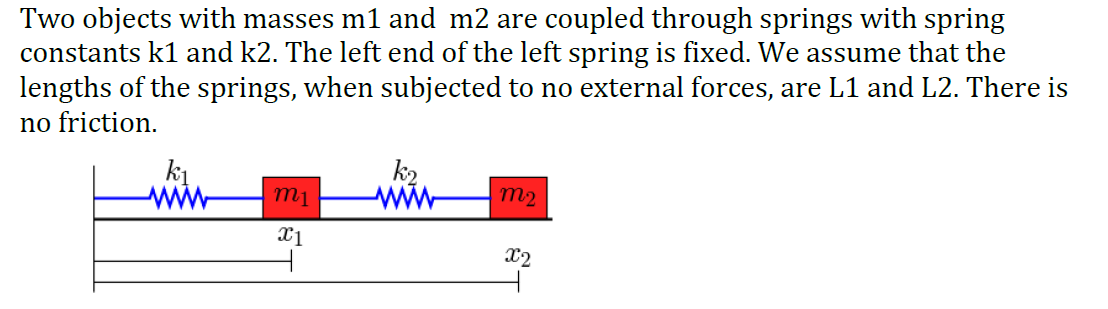

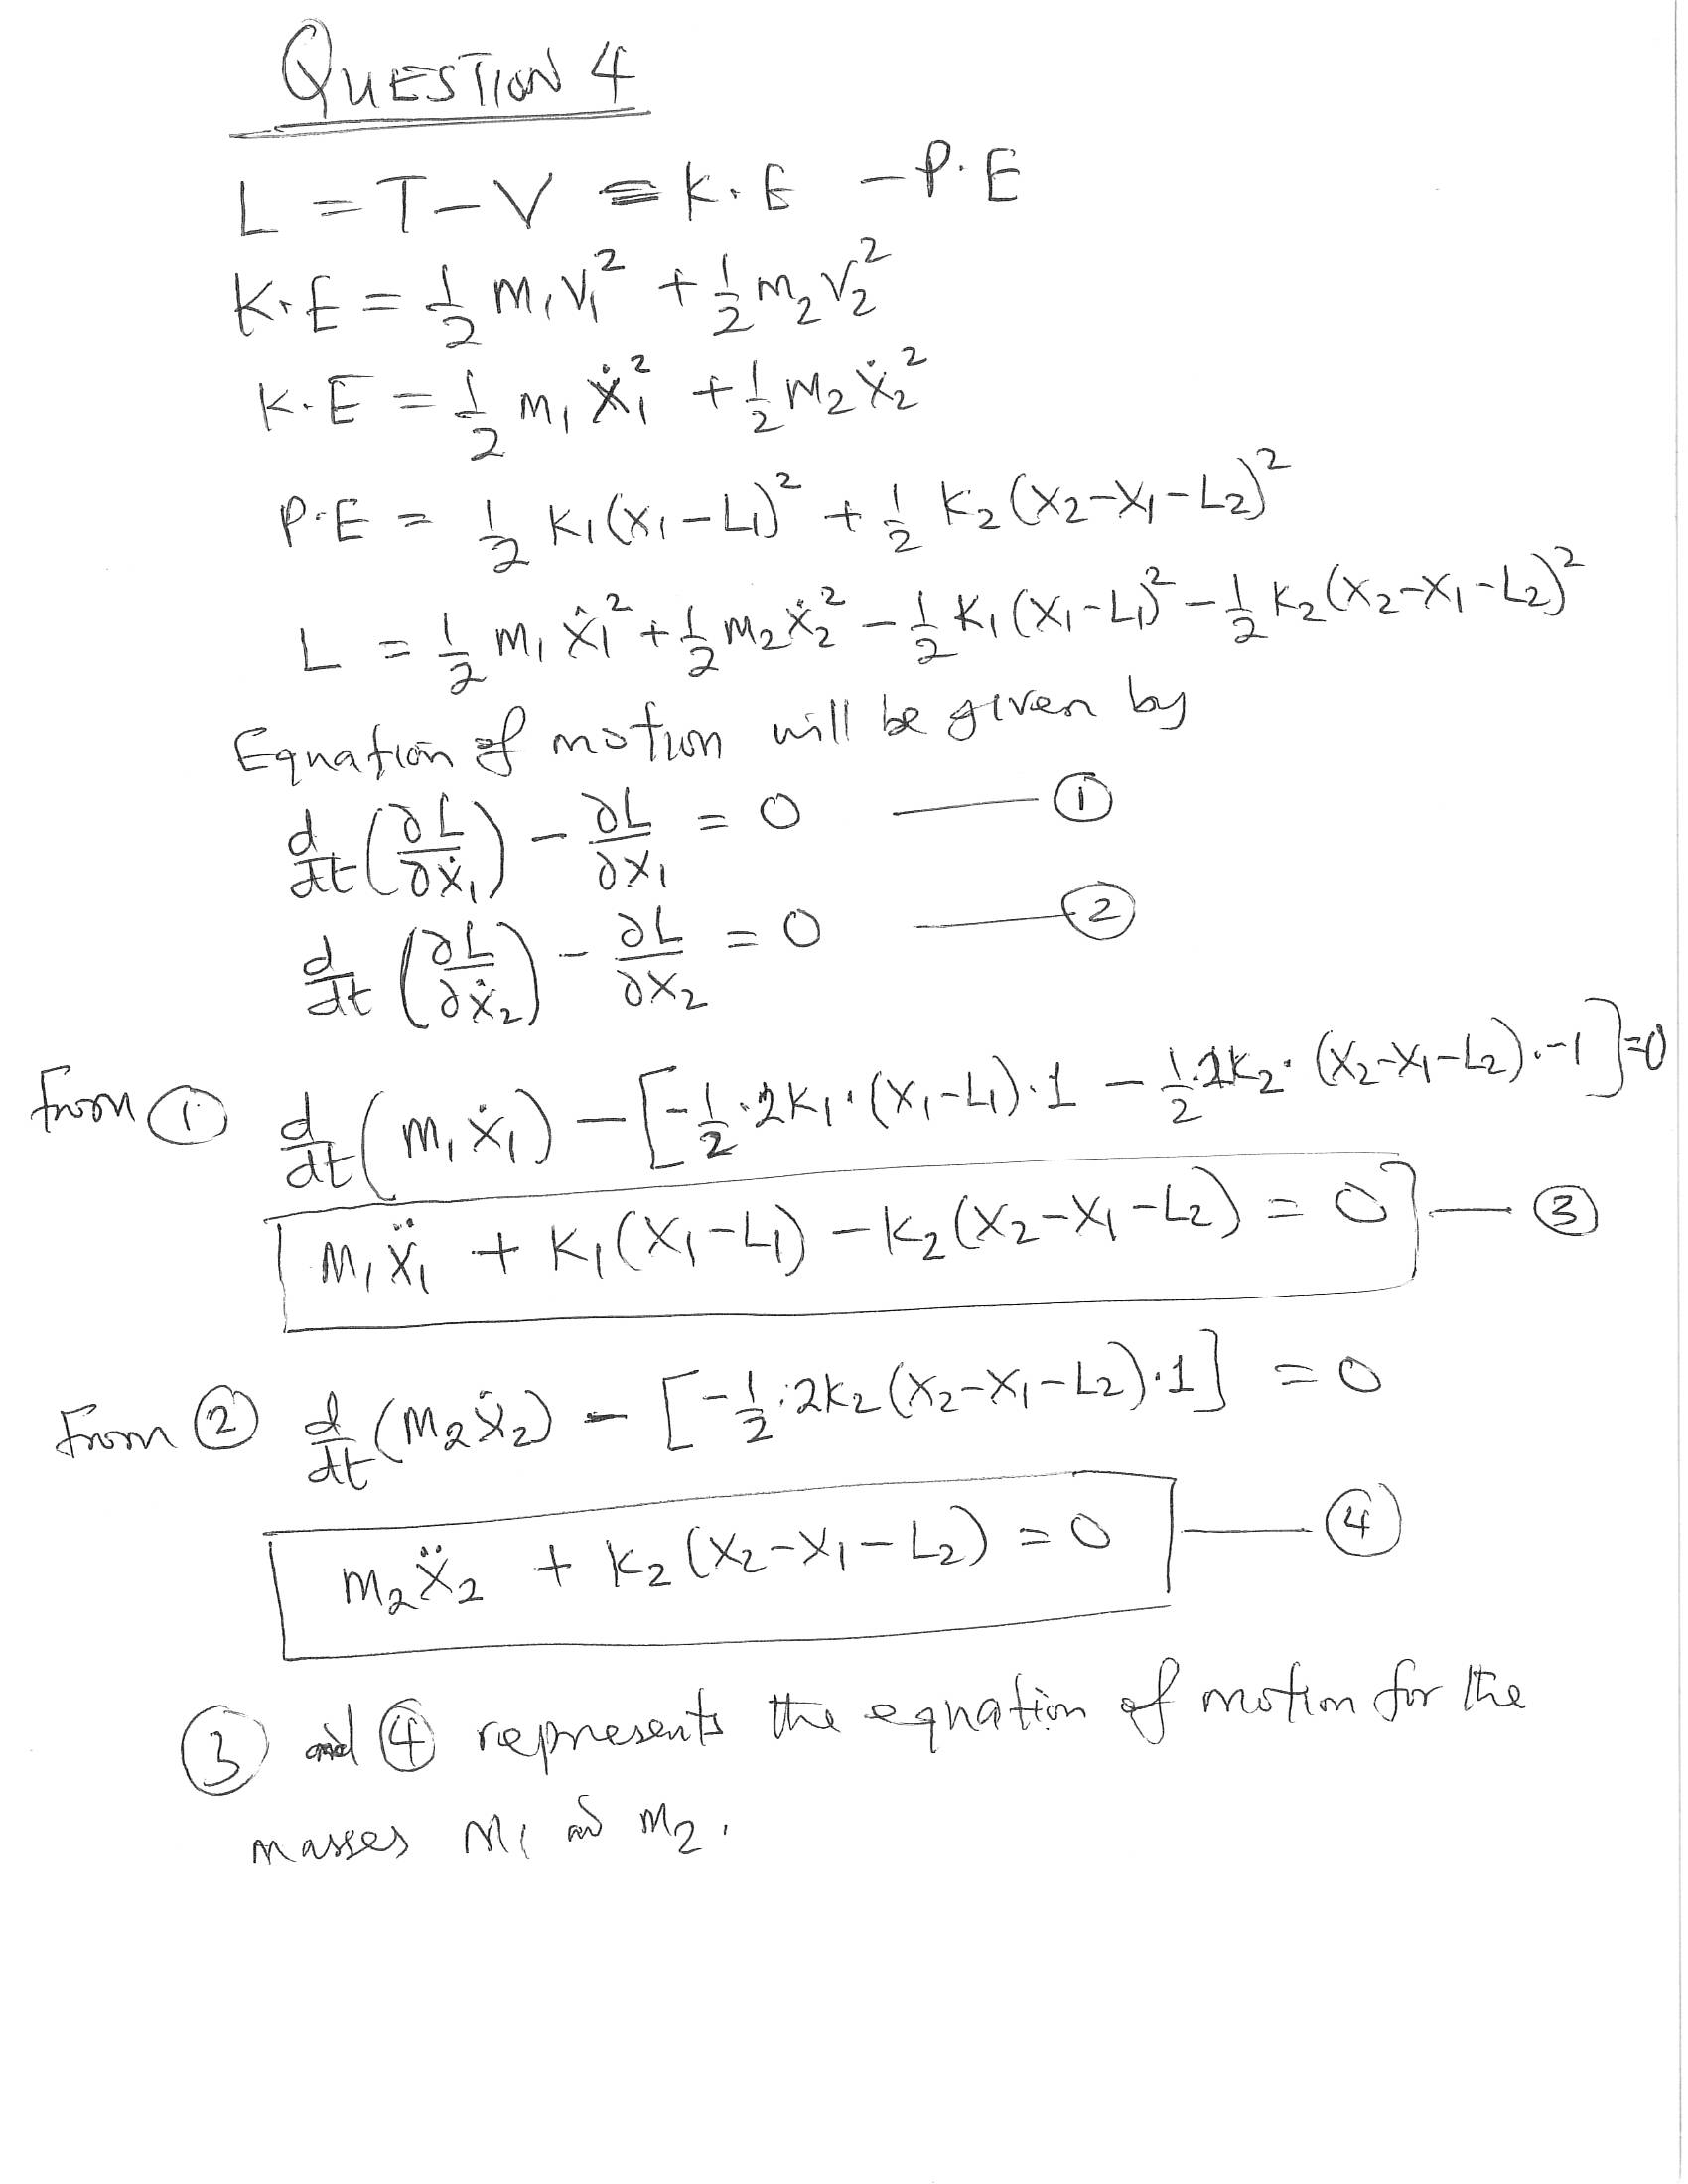

In [19]:
def spring(x1, t, L1, L2, m1, m2, k1, k2):
    dxdt=np.array([x1[1],
         (- k1 * (x1[0] - L1) + k2 * (x1[2] - x1[0] - L2)) / m1,
         x1[3],
         (- k2 * (x1[2] - x1[0] - L2)) / m2])
    return dxdt

# set the initial conditions
x0 = np.array([0.5,0,2.25,0])

# define the discretization points
timePoints4=np.linspace(0,5,100)

#define the constants 
# Masses:
m1 = 1.0
m2 = 1.5
# Spring constants
k1 = 8.0
k2 = 40.0
# Natural lengths
L1 = 0.5
L2 = 1.0 

solution4 = odeint(spring,x0,timePoints4, args=(L1, L2, m1, m2, k1, k2))

(0.0, 5.0)

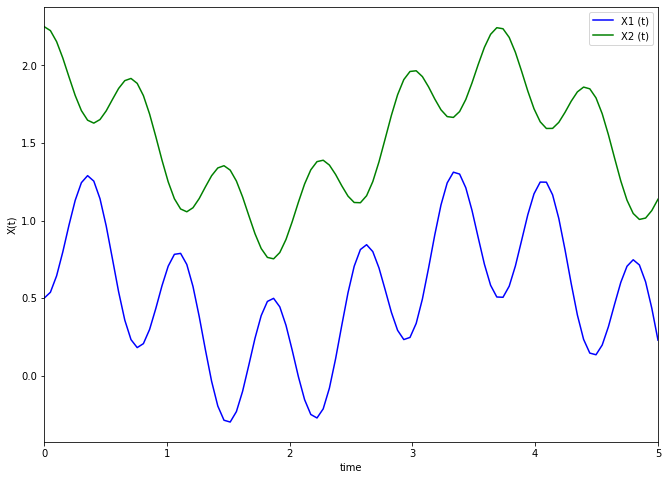

In [21]:
fig, ax5 = plt.subplots(figsize=(11,8))
ax5.plot(timePoints4, solution4[:, 0], 'b', label='X1 (t)')
ax5.plot(timePoints4, solution4[:, 2], 'g', label='X2 (t)')
ax5.legend(loc='best')
ax5.set_xlabel('time')
ax5.set_ylabel('X(t)')
ax5.set_xlim(0.0,5)